In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Data/Housing_Price_data.csv')

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data= data.drop(columns=['bathrooms','stories','mainroad','guestroom','hotwaterheating','airconditioning','prefarea','furnishingstatus']
         )
data.head()

,price,area,bedrooms,basement,parking
0,13300000,7420,4,no,2
1,12250000,8960,4,no,3
2,12250000,9960,3,yes,2
3,12215000,7500,4,yes,3
4,11410000,7420,4,yes,2


In [5]:
data.set_index('area',inplace=True)


In [6]:
data.head()

,price,bedrooms,basement,parking
area,,,,
7420,13300000,4,no,2
8960,12250000,4,no,3
9960,12250000,3,yes,2
7500,12215000,4,yes,3
7420,11410000,4,yes,2


In [7]:
data['basement'] = data['basement'].replace('no',0)
data['basement'] = data['basement'].replace('yes',1)

C:\Users\vengi\AppData\Local\Temp\ipykernel_11316\2473189113.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['basement'] = data['basement'].replace('yes',1)


In [23]:
data.head()

,price,bedrooms,basement,parking
area,,,,
7420,13300000,4,0,2
8960,12250000,4,0,3
9960,12250000,3,1,2
7500,12215000,4,1,3
7420,11410000,4,1,2


In [62]:
#training data
x1=data.index.values
#normalisation
x1 = x1/(x1.max())

x2=data['basement'].values
x3=data['bedrooms'].values
x4=data['parking'].values
X =[x1,x2,x3,x4]
X = np.array(X)

#training data's output
Y =data['price'].values

#w value
init_w1=100
init_w2=10
init_w3=1
init_w4=10
W= [init_w1,init_w2,init_w3,init_w4]
W = np.array(W)

init_b =1
alpha = 100
m,n = data.shape

no_of_iter= 100
Jhistory =[]


In [47]:
def cost_function(X,Y,W,B):
    J_wb=0
    for i in range(m): 
        err = np.dot(W,X[:,i])+B
        err = err- Y[i]
        err = err**2
        J_wb += err
            
    J_wb = J_wb/2*m

    return J_wb
    

In [48]:
def calculate_gradient(X,Y,W,B):
    d_dw = np.zeros((n,))
    d_db = 0
        
    for i in range(m):        
        err = np.dot(W,X[:,i])+B
        err = err- Y[i]
        for j in range(n):
            d_dw[j] = (d_dw[j] + err )* X[j,i]
        d_db += err
            
        d_dw = d_dw/m
        d_db = d_db/m

    return d_dw,d_db


In [49]:
def gradient_descent(X,Y,W,B,no_of_iter):
    for i in range(no_of_iter):
        d_dw,d_db = calculate_gradient(X,Y,W,B)
        W = W - alpha*(d_dw)
        B = B - alpha*(d_db)
        if i<100000: 
            Jhistory.append(cost_function(X,Y,W,B))

    return W,B
    

In [65]:
w,b = gradient_descent(X,Y,W,init_b,no_of_iter)

In [66]:
ycap = np.ones(m)
for i in range(m):
    ycap[i]= np.dot(X[:,i], w) + b
    print("prediction:" ,{ycap[i]} ,"target value: ",{Y[i]})

prediction: {2281200.4504354117} target value:  {13300000}
prediction: {2285149.2607753193} target value:  {12250000}
prediction: {1765662.8568576179} target value:  {12250000}
prediction: {2281425.0643216786} target value:  {12215000}
prediction: {2281210.4505603677} target value:  {11410000}
prediction: {1759370.9913895717} target value:  {10850000}
prediction: {2284167.346347173} target value:  {10150000}
prediction: {2825680.8554664208} target value:  {10150000}
prediction: {2282949.6654051933} target value:  {9870000}
prediction: {1754875.0704579235} target value:  {9800000}
prediction: {1773949.7040594346} target value:  {9800000}
prediction: {2277578.560737349} target value:  {9681000}
prediction: {2278965.2782514347} target value:  {9310000}
prediction: {2271174.388388769} target value:  {9240000}
prediction: {1760108.29143114} target value:  {9240000}
prediction: {2277578.560737349} target value:  {9100000}
prediction: {2279103.161820864} target value:  {9100000}
prediction: {

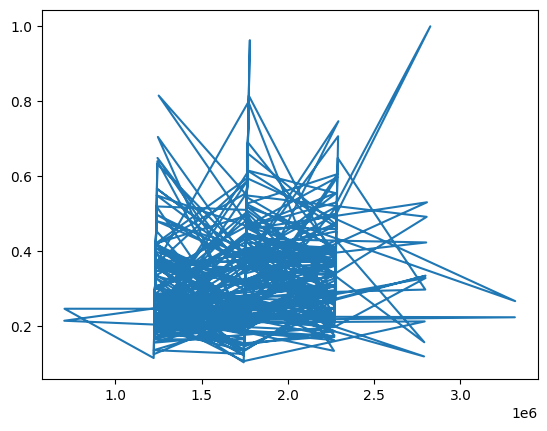

In [70]:
plt.plot(ycap,X[0,:])